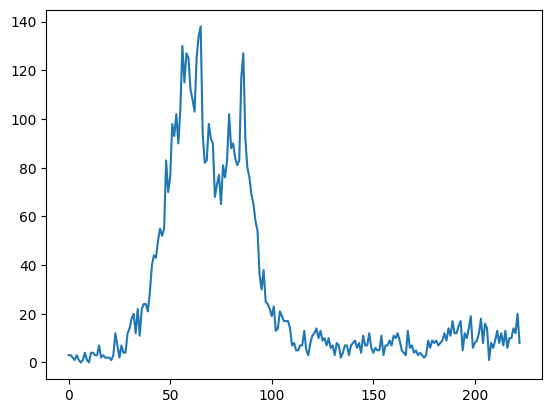

[[6.99659201e+06 1.27700251e+03 2.01248885e+03 1.18497512e+02
  1.50000000e+02]
 [6.99639706e+06 1.35895619e+03 2.12018745e+03 1.23796561e+02
  1.63683347e+02]
 [6.99619596e+06 1.43986788e+03 2.23460939e+03 1.29559326e+02
  1.78213560e+02]
 [6.99598979e+06 1.51886777e+03 2.35560301e+03 1.35743433e+02
  1.93578907e+02]
 [6.99578610e+06 1.58905650e+03 2.48258316e+03 1.42262440e+02
  2.09719543e+02]
 [6.99558231e+06 1.65388230e+03 2.61479462e+03 1.49017854e+02
  2.26556545e+02]
 [6.99537446e+06 1.71754328e+03 2.75202460e+03 1.55976061e+02
  2.44071128e+02]
 [6.99516843e+06 1.77487217e+03 2.89364108e+03 1.63059824e+02
  2.62197867e+02]
 [6.99495877e+06 1.83127738e+03 3.03968313e+03 1.70269985e+02
  2.80945750e+02]
 [6.99476069e+06 1.87297918e+03 3.18886838e+03 1.77463703e+02
  3.00176786e+02]
 [6.99455661e+06 1.91794434e+03 3.34084145e+03 1.84608936e+02
  3.19855474e+02]
 [6.99435184e+06 1.96059752e+03 3.49582162e+03 1.91736043e+02
  3.40010168e+02]
 [6.99415835e+06 1.99004285e+03 3.652863

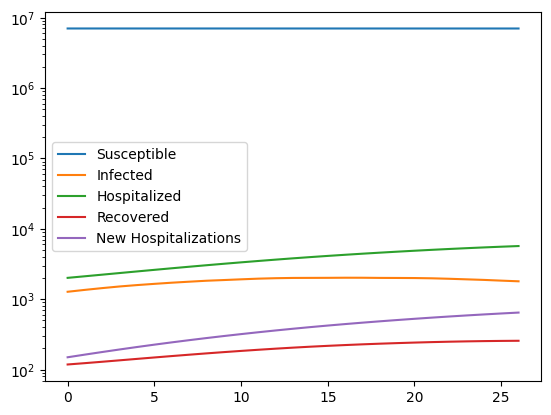

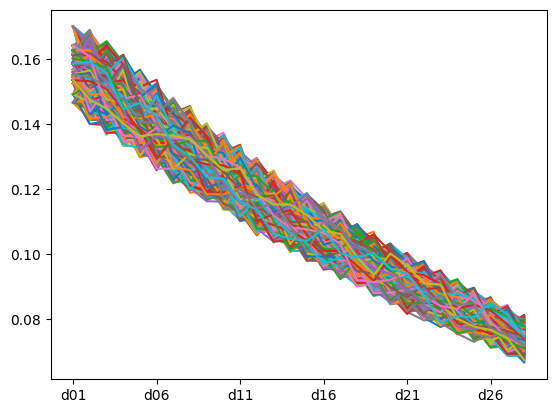

In [36]:
import numpy as np
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,odeint
import sys
import pandas as pd


predicted_beta = pd.read_csv('../datasets/out_logit-beta_trj_bootp.csv')
observations = pd.read_csv('../datasets/FLU_HOSPITALIZATIONS.csv').to_numpy()
observations = np.delete(observations,0,1)
estimated_state = pd.read_csv('../datasets/ESTIMATED_HOSP.csv').to_numpy()
estimated_state = np.delete(estimated_state,0,1)


plt.plot(observations)
plt.show()

def beta(t): 
    return float(predicted_beta.iloc[50,t])

y0 = np.concatenate((estimated_state[60],np.array([150])))

def RHS_H(state,t,param):
    #params has all the parameters – beta, gamma
    #state is a numpy array

        S,I,R,H,new_H = state #unpack the state variables
        N = S + I + R + H #compute the total population 

        new_H = (1/param['D'])*(param['gamma']) * I

        '''The state transitions of the ODE model is below'''
        dS = -param['beta'](int(t))*(S*I)/N + (1/param['L'])*R 
        dI = param['beta'](int(t))*S*I/N-(1/param['D'])*I
        dR = (1/param['hosp']) * H + ((1/param['D'])*(1-(param['gamma']))*I)-(1/param['L'])*R 
        dH = (1/param['D'])*(param['gamma']) * I - (1/param['hosp']) * H 

        return np.array([dS,dI,dR,dH,new_H])

t_span = np.linspace(0,27,27)

params={
"beta":beta,
"gamma":0.1,
"eta":0.1,
"std":10,
"R":1/10,
"hosp":15,
"L":90,
"D":10}

result_odeint = odeint(func=RHS_H,t = t_span,y0 = y0,args=(params,))
print(result_odeint)



plt.yscale('log')
labels = ['Susceptible','Infected','Hospitalized','Recovered','New Hospitalizations']
for i in range(5): 
    plt.plot(result_odeint[:,i],label = labels[i])
plt.legend()
plt.show()


for i in range(1000): 
    predicted_beta.iloc[i].plot()







